<img src="http://orientacion.universia.net.co/imgs2011/imagenes/logo-header-konradlorenz.png">
# Gaussian Moat Problem
### Simulation Final Project

<font face="Times" size = "4">
# Viviana Márquez*
<i>*Konrad Lorenz Fundación Universitaria</i><br>
20 May 2017 

<b>Keywords:</b> Gaussian integers, Gaussian primes, Gaussian moat problem, simulation.<br><br>
<b>Abstract:</b> This project will tackle the Gaussian moat problem, an open problem since its proposal at the International Congress of Mathematics in Stockholm in 1962. First, we study whether the Gaussian prime numbers appear at random in the complex plane or not. Then, we use random walks to test the current state of the art to draw conclusions about possible new ways to attempt this problem.  
<hr>

## 1. Introduction
### 1.1 Gaussian Integers 

<font face="Times" size = "4">
<br> There are many well known set of numbers such as the set of natural numbers $\mathbb{N}= \{1,2,3,...\}$, integer numbers $\mathbb{Z}= \{...,-2,-1,0,1,2,...\}$, rational numbers $\mathbb{Q}= \Big\{\dfrac{m}{n}$ $|$ $ m \in \mathbb{Z}, n \in \mathbb{N}\Big\}$, complex numbers $\mathbb{C}= \{a+bi$ $|$ $a,b \in \mathbb{R}\}$, and so on.


In the year 1832, Carl Friedrich Gauss, a German mathematician now known as the Prince of Mathematics, wondered what would happen if we considered the set of complex numbers whose real and imaginary parts are integer numbers. From his musings, the set of Gaussian integers was born.<br><br>

These are complex numbers of the form:<br><br>
<center>$\mathbb{Z}[i] = \{a+ib$ $|$ $a,b \in \mathbb{Z}\}$</center>


This set is a ring with two well defined operations, sum and product. In fact, this set is an Unique Factorization Domain (UFD), i.e., it satiesfies the fundamental theorem of arithmetic. An intuitive way to grasp this set is to realize that the Gaussian integers form a lattice of points in teh complex plane, as we will see in the following figure:

<img src="Images\lattice.png">

### 1.2 Gaussian Primes

<font face="Times" size = "4"><br>
Notice that the units of the ring are $\{ \pm 1, \pm i\}$, i.e., every number in $\mathbb{Z}[i]$ is divisible by any of those four numbers. From this, the definition of <b>Gaussian prime</b> follows: Any Guassian integer $g$ is prime if and only if it is divisible only by $\{ \pm 1, \pm i, \pm g, \pm ig\}$.<br>

In order to determine whether a Gaussian integer $a+ib$ is a Gaussian prime or not, we have to check that one of the following is true:
1. Either $a$ or $b$ is zero, and the other one is a prime in $\mathbb{Z}$ of the form $4n+3$ or $-(4-3n)$. 
2. Both are nonzero and $a^2+b^2$ is a prime in $\mathbb{Z}$.

Most open problems related to Gaussian integers are concerned with Gaussian prime numbers, specifically, with their distribution in the complex plane, given the fact that they present a special symmetry as we will see in this project. In addition, Gaussian prime integers are of particular interest to security algorithms and image watermarking[1].

### 1.3 Gaussian moat problem

<font face="Times" size = "4"><br>
In 1962, Basil Gordon, an american mathematician, proposed at International Congress of Mathematicians in Stockholm the <b>Gaussian moat problem</b> and it remains unsolved to this day. The problem asks the following question: Is it possible to walk to infnity using the Gaussian primes as stepping stones and taking steps of an uniformly bounded lenght?[2]
<br>

Observe that there is an answer for this kind of question in the usual prime numbers. According to the prime number theorem, there are arbitrarily large gaps between prime numbers, therefore it is not possible to walk to infinity taking steps of an uniformly bounded lenght using usual primes.

##### State of the art 
<center><figure>
    <img src='Images\d2.png' alt='missing'/>
    <figcaption><font color="gray">Image from [3]</font></figcaption>
</figure></center>

It is known that there is a 8-fold symmetry in the distribution of the Gaussian primes in the complex plane, therefore, we only need to study the plane in the region from $0$ to $\dfrac{\pi}{4}$. Also, in 1998, Gethner, Wagon, and Wick showed that there is no straight-line walks and that $D \geq \sqrt{26}$ in general. Then, in 2004, Tsuchimura gave a better result, proving that $D \geq 6$. It is believed that the answer to the Gaussian moat problem is negative.

<hr>
## 2. My way to attack the problem

### 2.1 Gaussian Primes in the complex plane
<font face="Times" size = "4">
First, I am going to obtain the Gaussian primes in the complex plane in a specific range.

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pylab
import random
%matplotlib inline 

In [2]:
def is_prime(n):
    return all([(n%j) for j in range(2, int(n**0.5)+1)]) and n>1

In [3]:
def gauss_int(ran):
    gaussian_integers = []
    for i in range (-ran,ran+1):
        for j in range (-ran,ran+1):
            gaussian_integers.append(complex(i,j))
    return (gaussian_integers)

In [4]:
def gauss_prim(gaussian_integers):
    gaussian_primes = []
    for k in range(0,len(gaussian_integers)-1):
        if gaussian_integers[k].real!=0 and gaussian_integers[k].imag!=0:
            if is_prime(int(((gaussian_integers[k].real)**2+(gaussian_integers[k].imag)**2)))==True:
                gaussian_primes.append(gaussian_integers[k])
        if gaussian_integers[k].imag==0:
            if (abs(gaussian_integers[k].real)-3)%4==0 and is_prime(int(abs(gaussian_integers[k].real)))==True:
                gaussian_primes.append(gaussian_integers[k])
        if gaussian_integers[k].real==0:
            if (abs(gaussian_integers[k].imag)-3)%4==0 and is_prime(int(abs(gaussian_integers[k].imag)))==True:
                gaussian_primes.append(gaussian_integers[k])
    return (gaussian_primes)

In [5]:
ran = 100
gaussian_integers = gauss_int(ran)
gaussian_primes = gauss_prim(gaussian_integers)

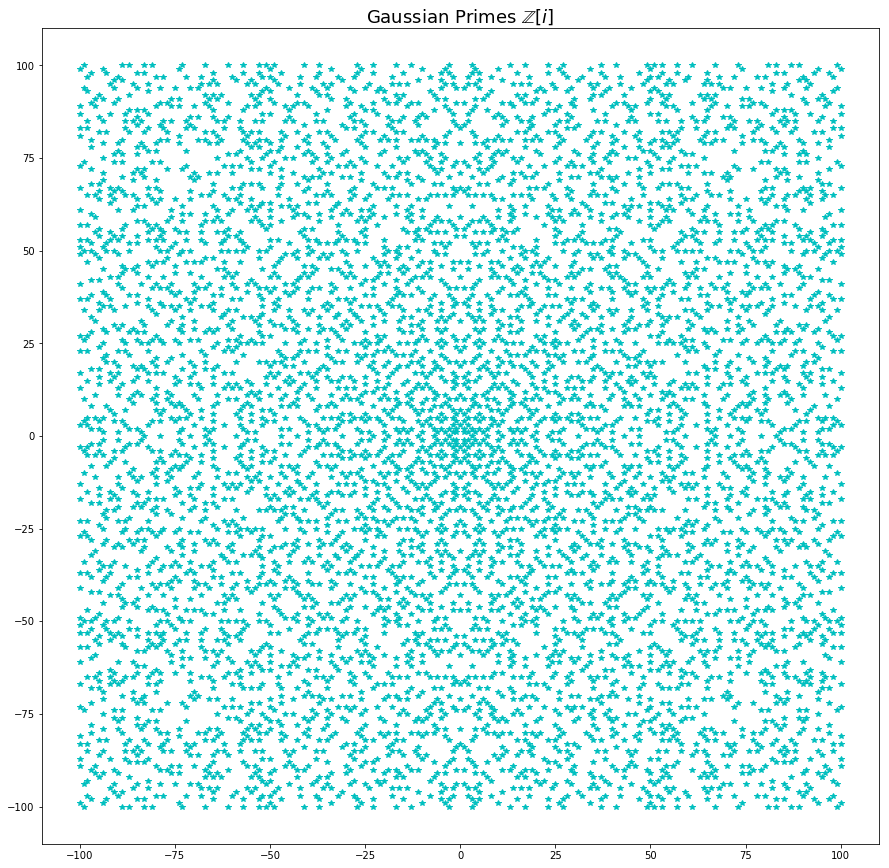

In [8]:
plt.title(r'Gaussian Primes $\mathbb{Z}[i]$', fontsize=18)
mpl.rc("figure", figsize=(15, 15))
plt.plot(np.real(gaussian_primes),np.imag(gaussian_primes),"c*")

<font face="Times" size = "4">
Now, let us take a look at the behavior of the Gaussian primes in different scales, ranges, and representations.
<img src="Images\collage.jpg">

<font face="Times" size = "4">
From the graphs of the first two rows, we can conjecture that the gap between each Gaussian prime number is linear. It would be interesting to run a spectral test to test whether these gap distances are random or not. Notice that since we are working in the complex plane, these plots would be in $\mathbb{R}^{n^2}$. Due to the fact that we are able to plot up to $\mathbb{R}^3$, I am going to take separately the real and imaginary parts.

### 2.2 Spectral test for Gaussian primes

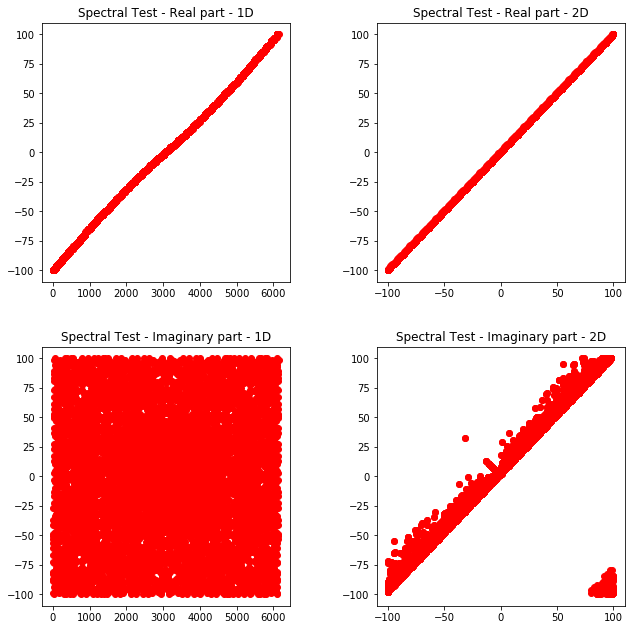

In [9]:
plt.figure(1)

plt.subplot(331)
plt.title("Spectral Test - Real part - 1D")
plt.plot(np.real(gaussian_primes),"ro")

plt.subplot(332)
plt.title("Spectral Test - Real part - 2D")
plt.plot(np.real(gaussian_primes)[:-1],np.real(gaussian_primes)[1:],"ro")

plt.subplot(334)
plt.title("Spectral Test - Imaginary part - 1D")
plt.plot(np.imag(gaussian_primes),"ro")

plt.subplot(335)
plt.title("Spectral Test - Imaginary part - 2D")
plt.plot(np.imag(gaussian_primes)[:-1],np.imag(gaussian_primes)[1:],"ro")



plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)

mpl.rc("figure", figsize=(12, 12))
plt.show()

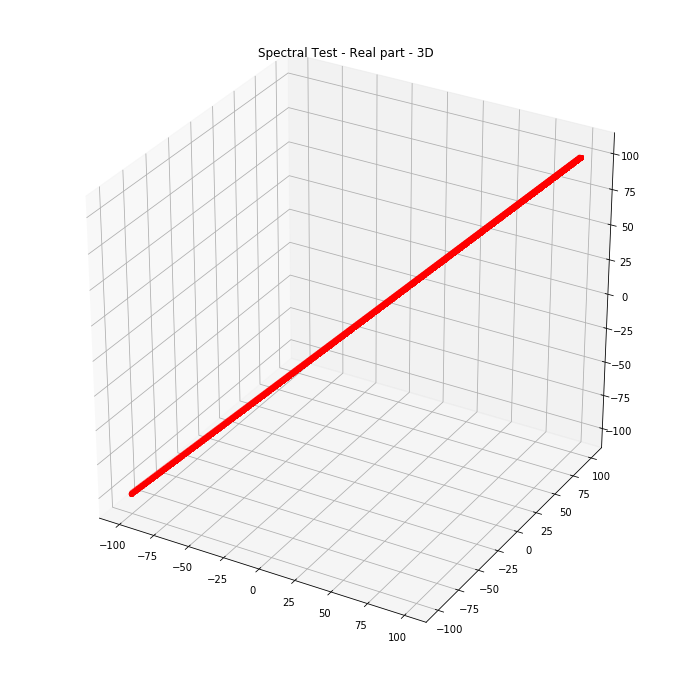

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
plt.title("Spectral Test - Real part - 3D")
mpl.rc("figure", figsize=(8, 8))
ax.scatter(np.real(gaussian_primes)[:-2],np.real(gaussian_primes)[1:-1],np.real(gaussian_primes)[2:],c="r",marker="o")

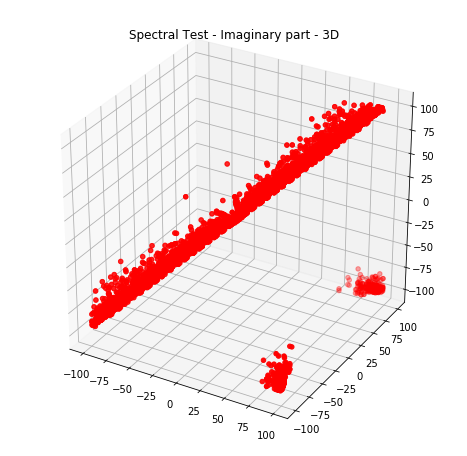

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111,projection="3d")
plt.title("Spectral Test - Imaginary part - 3D")
mpl.rc("figure", figsize=(8, 8))
ax.scatter(np.imag(gaussian_primes)[:-2],np.imag(gaussian_primes)[1:-1],np.imag(gaussian_primes)[2:],c="r",marker="o")

<font face="Times" size = "4">
From the spectral test, we can conclude clearly that the distribution of Gaussian primes are not random at all. In fact, the real part of G-primes seems <b>very</b> linear, while the imaginary part presents a rather interesting pattern. It is linear for the most part, presenting a different behavior in the up-left diagonal from the origin and a heart-shaped figure in the bottom-right.

<font face="Times" size = "4">
## 2.3 Random Walks for Gaussian primes

In [12]:
def rand_walk(ran,step):
    gaussian_integers = gauss_int(ran)
    gaussian_primes = gauss_prim(gaussian_integers)

    n = len(gaussian_primes)

    x = np.zeros(n)
    y = np.zeros(n)

    for i in range(1, n):
        val = random.randint(1, 4) #up,down,left,right
        if val == 1:
            x[i] = x[i - 1] + step
            y[i] = y[i - 1]
        elif val == 2:
            x[i] = x[i - 1] - step
            y[i] = y[i - 1]
        elif val == 3:
            x[i] = x[i - 1]
            y[i] = y[i - 1] + step
        else:
            x[i] = x[i - 1]
            y[i] = y[i - 1] - step 
            
    return x,y,np.real(gaussian_primes),np.imag(gaussian_primes)

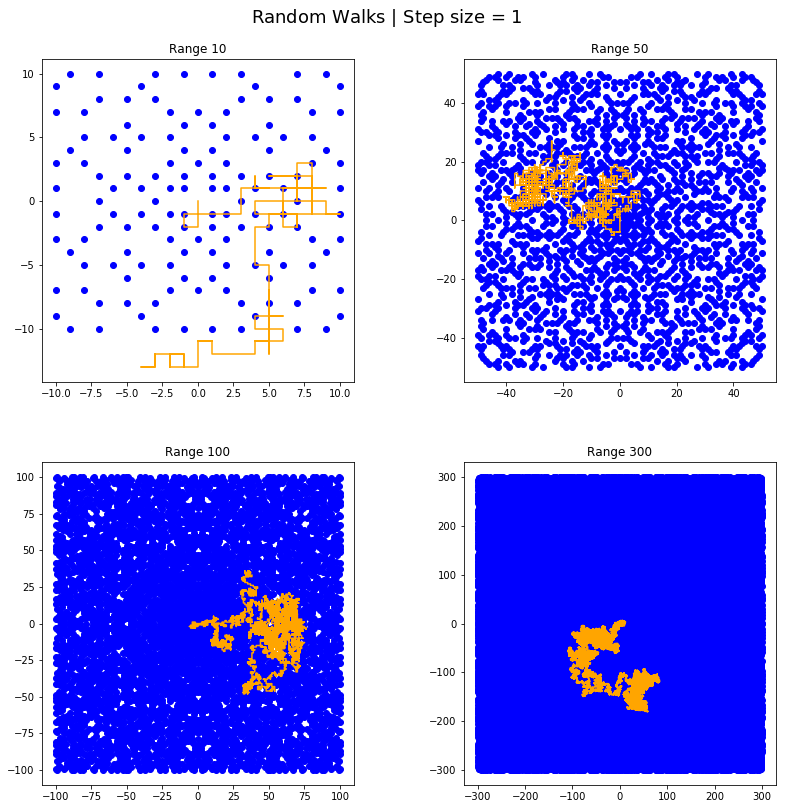

In [14]:
step=1
plt.figure()


plt.subplot(221)
ran = 10
dat = rand_walk(ran,step)
plt.title("Range " + str(ran) + "")
plt.plot(dat[2],dat[3],"bo")
plt.plot(dat[0], dat[1], "orange")


plt.subplot(222)
ran = 50
dat = rand_walk(ran,step)
plt.title("Range " + str(ran) + "")
plt.plot(dat[2],dat[3],"bo")
plt.plot(dat[0], dat[1], "orange")


plt.subplot(223)
ran = 100
dat = rand_walk(ran,step)
plt.title("Range " + str(ran) + "")
plt.plot(dat[2],dat[3],"bo")
plt.plot(dat[0], dat[1], "orange")


plt.subplot(224)
ran = 300
dat = rand_walk(ran,step)
plt.title("Range " + str(ran) + "")
plt.plot(dat[2],dat[3],"bo")
plt.plot(dat[0], dat[1], "orange")

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


mpl.rc("figure", figsize=(12, 12))
plt.suptitle(r'Random Walks | Step size = $1$', fontsize=18)
plt.show()

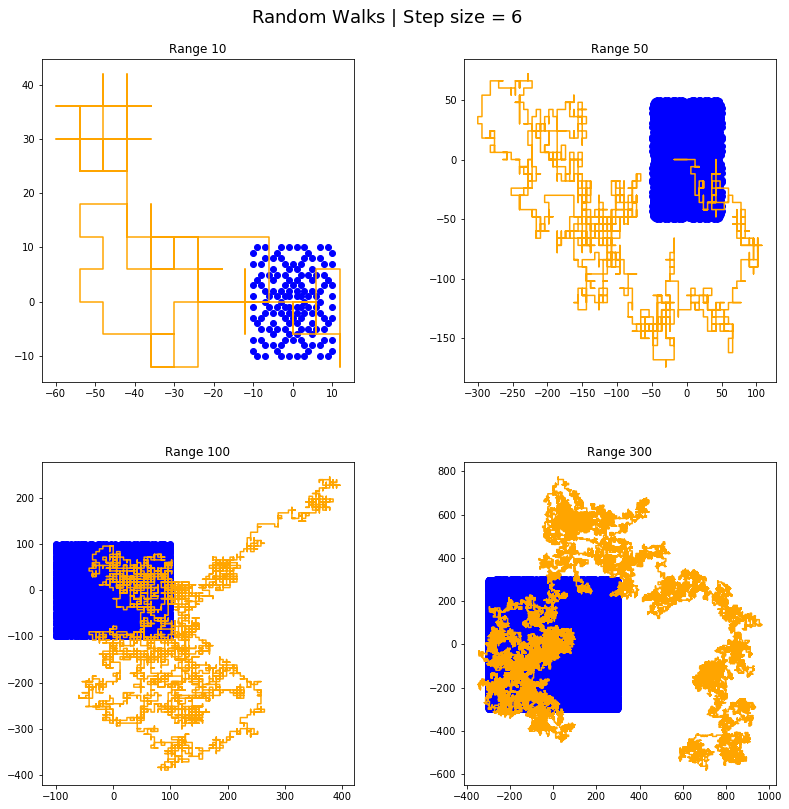

In [15]:
step=6
plt.figure()


plt.subplot(221)
ran = 10
dat = rand_walk(ran,step)
plt.title("Range " + str(ran) + "")
plt.plot(dat[2],dat[3],"bo")
plt.plot(dat[0], dat[1], "orange")


plt.subplot(222)
ran = 50
dat = rand_walk(ran,step)
plt.title("Range " + str(ran) + "")
plt.plot(dat[2],dat[3],"bo")
plt.plot(dat[0], dat[1], "orange")


plt.subplot(223)
ran = 100
dat = rand_walk(ran,step)
plt.title("Range " + str(ran) + "")
plt.plot(dat[2],dat[3],"bo")
plt.plot(dat[0], dat[1], "orange")


plt.subplot(224)
ran = 300
dat = rand_walk(ran,step)
plt.title("Range " + str(ran) + "")
plt.plot(dat[2],dat[3],"bo")
plt.plot(dat[0], dat[1], "orange")


plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)


mpl.rc("figure", figsize=(12, 12))
plt.suptitle(r'Random Walks | Step size = $6$', fontsize=18)
plt.show()

<font face="Times" size = "4">
From these random walks with Manhattan distance, we can see that using step size = $1$ we can't reach "infinity", not even for small $n$. In the other hand, we are able to reach "infinity" with step size = $6$, number given by Tsuchimura, for small $n$ such as $n=300$.

<hr>
## 3. Conclusions
<font face="Times" size = "4">
<br>Having tested the Gaussian primes with the spectral test leaves no doubt that these numbers appear in the complex plane in a systematic way. This result leads to even further questions such as: What kind of pattern do these numbers follow? One way to approach this question is through the Gaussian moat. Finding an answer to this open problem could shed light into the behaviour of the Gaussian primes. In this project, I conjecture that using through random walks, with a more robust algorithm and computer, it might be possible to give a better approximation of the lenght of the steps the Gaussian moat problem than the current state of the art.<br><br> In addition, from this project, another interesting question arise. Could we extend the moat problem to other algebraic rigns? 

<hr>
## References

<font face="Times" size = "4"><br>
[1] Aleksey, K. (2011, August). SECURITY SYSTEMS BASED ON GAUSSIAN INTEGERS: ANALYSIS OF BASIC OPERATIONS AND TIME COMPLEXITY OF SECRET TRANSFORMATIONS. Retrieved from http://archives.njit.edu/vol01/etd/2010s/2011/njit-etd2011-092/njit-etd2011-092.pdf<br>
[2] TSUCHIMURA, N. (2004, March). Computational Results for Gaussian Moat Problem. Retrieved from http://www.keisu.t.u-tokyo.ac.jp/research/techrep/data/2004/METR04-13.pdf<br>
[3] Whitty, R. (n.d.). THEOREM OF THE DAY. Retrieved from http://www.theoremoftheday.org/NumberTheory/GordonMoat/TotDGordonMoat.pdf